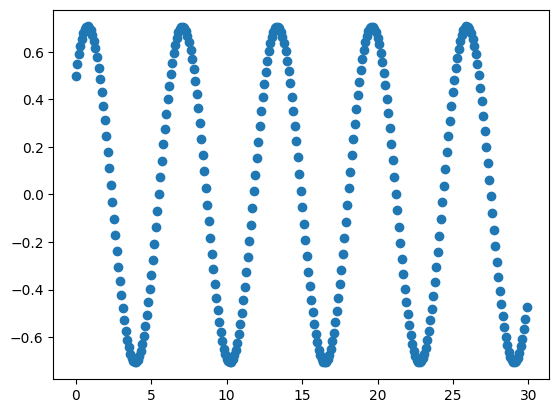

Number of parameters:  1761


100%|██████████| 2000/2000 [00:02<00:00, 720.86it/s]


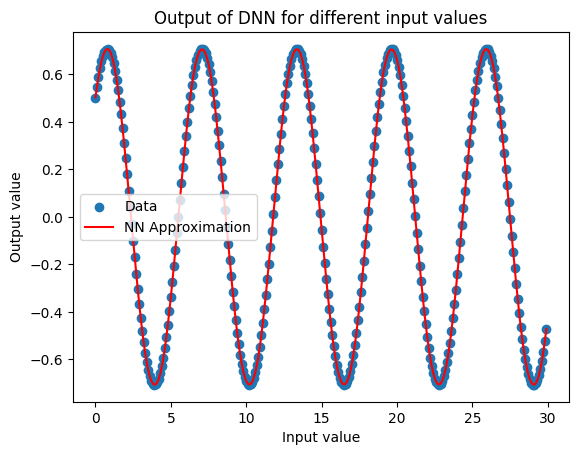

Error:  0.0008328465114431201


In [38]:
import numpy as np
import torch
import torch.nn as nn

from matplotlib import pyplot as plt
from tqdm import tqdm
from math import sin, cos

size = 40

def defined_function(x):
    # Given very complicated function
    return sin(x) + cos(x) 

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.fc1 = nn.Linear(1,size)  # Input: 1 feature, Output: 128 units
        self.fc2 = nn.Linear(size, size)  # Hidden layer: 128 units
        self.fc4 = nn.Linear(size, 1)    # Output: 1 feature

    def forward(self, x):
        x = torch.sin(self.fc1(x))
        x = torch.sin(self.fc2(x))
        x = torch.sin(self.fc4(x))
        
        return x

def training_step(x_train, y_train, model, criterion, optimizer):
    # Forward pass
    x_train = x_train.to(device="cuda")
    outputs = model(x_train)
    outputs = outputs.to(device="cuda")
    y_train = y_train.to(device="cuda")
    
    outputs = outputs.float()
    y_train = y_train.float()
    
    loss = criterion(outputs, y_train)
    loss = loss.to(device="cuda")
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()

# Input values for the defined function
x_train = np.arange(0, 30, 0.1, dtype=np.float32)
x_train = np.array(x_train)
y_train = np.zeros(len(x_train))

x_test = np.arange(0, 30, 0.1, dtype=np.float32)
x_test = np.array(x_test)
y_test = np.zeros(len(x_test))

for i in range(len(x_train)):
    y_train[i] = defined_function(x_train[i])
    y_train[i] = y_train[i] / 2
    
for i in range(len(x_test)):
    y_test[i] = defined_function(x_test[i])
    y_test[i] = y_test[i] / 2

plt.scatter(x_train, y_train)
plt.show()
x_train = torch.from_numpy(x_train.reshape(-1, 1))
y_train = torch.from_numpy(y_train.reshape(-1, 1))

model = model()
model.cuda()
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("Number of parameters: ", sum(p.numel() for p in model.parameters() if p.requires_grad))

# Training loop
for epoch in tqdm(range(2000)):
    loss = training_step(x_train, y_train, model, criterion, optimizer)
    
# Test the model
x_test = torch.from_numpy(x_test.reshape(-1, 1))
x_test = x_test.cuda()
y_test = model(x_test).detach().cpu().numpy()

x_test = x_test.cpu()
    
# Plot the results with the ideal linear function
plt.scatter(x_train.numpy(), y_train.numpy(), label="Data")
plt.plot(x_test, y_test, color="red", label="NN Approximation")
plt.legend()
plt.title("Output of DNN for different input values")
plt.xlabel("Input value")
plt.ylabel("Output value")
plt.show()

print("Error: ", np.mean(np.abs(y_test - y_train.numpy())))